In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
Qy_frac = 0.18

In [4]:
intensity_list = np.linspace(0.5e11, 3e11, 6)

In [5]:
Qy_dict = pickle.load(open('Qy_coherent_vs_Intensity_6D_ayy0.0_QpyQpx0.0_sigmaZ23cm_wakesQ20_2018_complete.pkl', 'rb'))
Qx_dict = pickle.load(open('Qx_coherent_vs_Intensity_6D_ayy0.0_QpyQpx0.0_sigmaZ23cm_wakesQ20_2018_complete.pkl', 'rb'))

In [6]:
Qy_dict

{'intensity 50000000000.0': 0.1739269109010235,
 'intensity 100000000000.0': 0.16762878935366943,
 'intensity 150000000000.0': 0.16115901122709314,
 'intensity 200000000000.0': 0.15549149447998656,
 'intensity 250000000000.0': 0.1510725382583466,
 'intensity 300000000000.0': 0.1330785780288195}

In [7]:
Qy_list = []
Qx_list = []
for intensity in intensity_list:
    Qy_list.append(Qy_dict[f'intensity {intensity}'])
    Qx_list.append(Qx_dict[f'intensity {intensity}'])

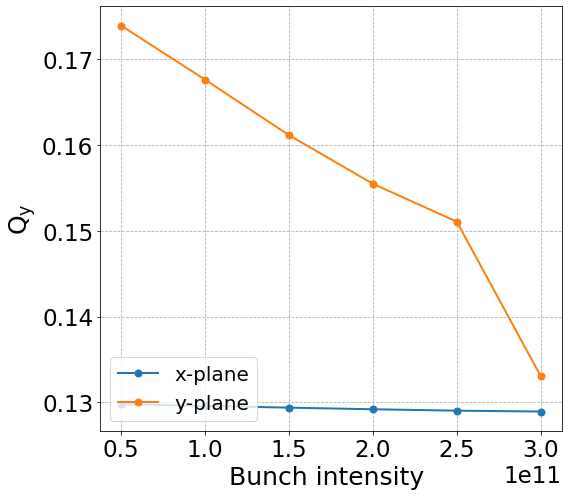

In [8]:
plt.plot(intensity_list, Qx_list, '-o', c='C0', label='x-plane')
plt.plot(intensity_list, Qy_list, '-o', c='C1', label='y-plane')


#plt.ylabel(r'$\mathrm{Q_y-Q_{y_0}}$')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.ylabel(r'$\mathrm{Q_y}$')
plt.xlabel('Bunch intensity ')
plt.grid(linestyle='dashed')
plt.legend(loc=3)

plt.tight_layout()


#plt.ylim(0.16, 0.23)
savefig = False
if savefig:
    plt.savefig(f'TuneShift_vs_Intensity_ayy{app_y}_QpxQpy{Qp_x}_ayy{app_y}_QpyQpx{Qp_x}_wakesQ20_2012_complete.png', bbox_inches='tight')

### Perform a linear fit over the first 3 points

In [9]:
n_points = 3
a, b = np.polyfit(intensity_list[:n_points], Qy_list[:n_points], deg=1)
print(a)

-1.2767899673930413e-13


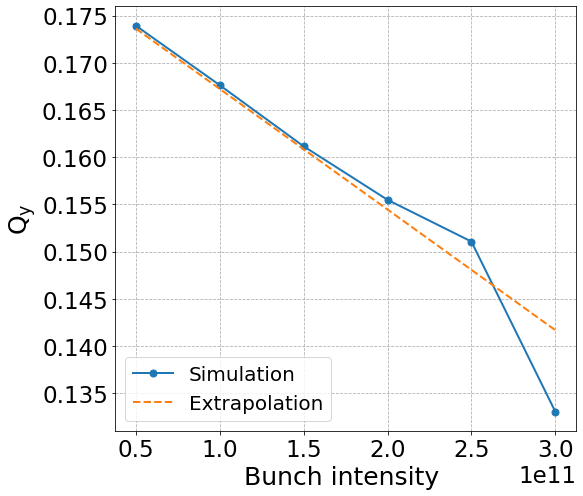

In [10]:
plt.plot(intensity_list, Qy_list, '-o', label='Simulation')
plt.plot(intensity_list, Qy_frac+intensity_list*a, '--', label='Extrapolation')

plt.ylabel(r'$\mathrm{Q_y}$')
plt.xlabel('Bunch intensity ')
plt.grid(linestyle='dashed')
plt.legend(loc=3)

plt.tight_layout()


#plt.ylim(0.16, 0.23)

savefig = False
if savefig:
    plt.savefig(f'DQy_vs_intensity_Q20_2012_fullSPSQ20_steps_newBPMs_v2_QpxQpy2.png', bbox_inches='tight')

### Load theory

In [23]:
theory_chao = pickle.load(open('Qy_coherent_vs_Intensity_Chao_QpyQpx0_SPS_26GeV_Q20_2018_complete_dipolesANDQuads_sigmaZ23cm.pkl', 'rb'))

In [26]:
DQy_chao = []
intensity_list_theory = np.linspace(0.5e11, 3e11, 6)
for i in intensity_list_theory:
    DQy_chao.append(theory_chao[f'intensity {i}'])

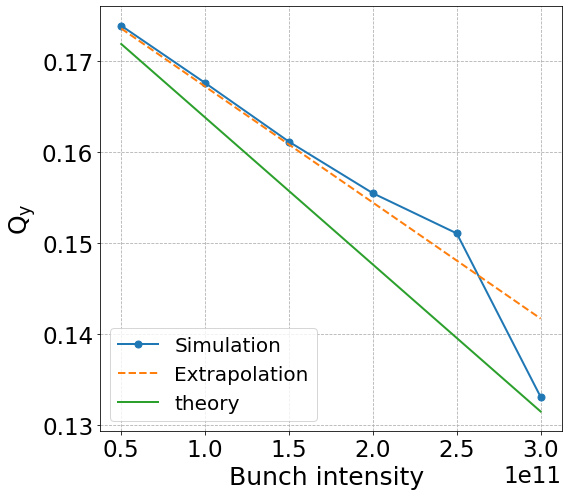

In [27]:
plt.plot(intensity_list, Qy_list, '-o', label='Simulation')
plt.plot(intensity_list, Qy_frac+intensity_list*a, '--', label='Extrapolation')
plt.plot(intensity_list_theory, 0.18+np.array(DQy_chao), label='theory')
plt.ylabel(r'$\mathrm{Q_y}$')
plt.xlabel('Bunch intensity ')
plt.grid(linestyle='dashed')
plt.legend(loc=3)

plt.tight_layout()


#plt.ylim(0.16, 0.23)

savefig = False
if savefig:
    plt.savefig(f'DQy_vs_intensity_Q20_2012_fullSPSQ20_steps_newBPMs_v2_QpxQpy2.png', bbox_inches='tight')

### Try to plot approximately the measured slope 
Approx from Fig 1 https://accelconf.web.cern.ch/IPAC2014/papers/tupme026.pdf

In [28]:
y1=0.178
y2=0.148
x1=0.5e11
x2=2.8e11

In [29]:
slope = (y2-y1)/(x2-x1)
print(slope)

-1.3043478260869564e-13


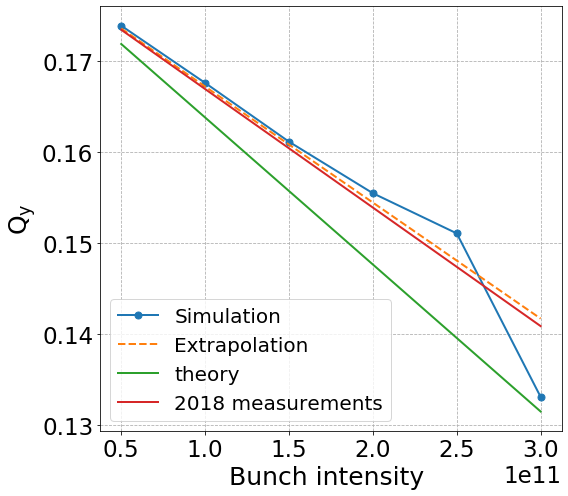

In [43]:
plt.plot(intensity_list, Qy_list, '-o', label='Simulation')
plt.plot(intensity_list, Qy_frac+intensity_list*a, '--', label='Extrapolation')
plt.plot(intensity_list_theory, 0.18+np.array(DQy_chao), label='theory')
plt.plot(intensity_list, Qy_frac+intensity_list*slope, '-', label='2018 measurements')



plt.ylabel(r'$\mathrm{Q_y}$')
plt.xlabel('Bunch intensity ')
plt.grid(linestyle='dashed')
plt.legend(loc=3)

plt.tight_layout()

#plt.ylim(0.16, 0.23)

savefig = False
if savefig:
    plt.savefig(f'DQy_vs_intensity_Q20_2012_fullSPSQ20_steps_newBPMs_v2_QpxQpy-5.png', bbox_inches='tight')

### Try to add the percentages of the TUNE SHIFT

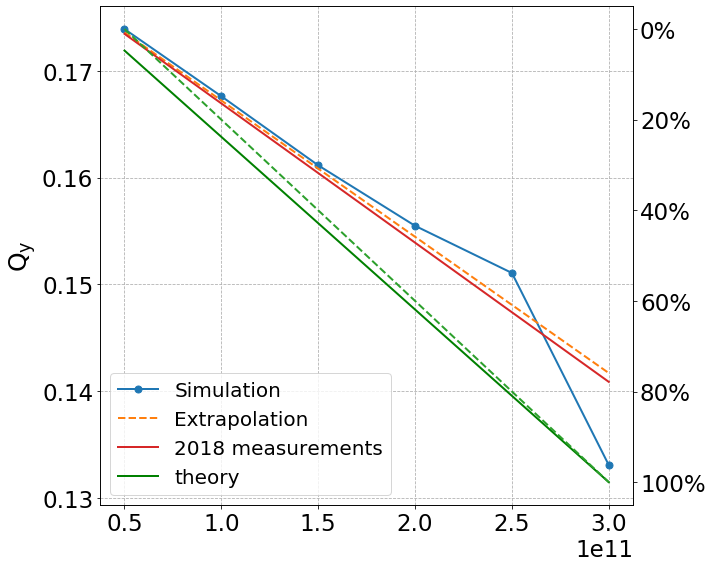

In [42]:
import matplotlib.ticker as mtick

perc = np.linspace(0, 100, len(DQy_chao))#len(intensity_list*slope))

fig, ax1 = plt.subplots(figsize=(10,8))

ax1.plot(intensity_list, Qy_list, '-o', c='C0', label='Simulation')
ax1.plot(intensity_list, Qy_frac+intensity_list*a, '--', c='C1', label='Extrapolation')
ax1.plot(intensity_list, Qy_frac+intensity_list*slope, '-', c='C3', label='2018 measurements') 

plt.plot(intensity_list_theory, 0.18+np.array(DQy_chao),c='g', label='theory')

ax1.set_ylabel(r'$\mathrm{Q_y}$')#-Q_{y_0}}$')

ax2 = ax1.twinx() 

ax2.plot(intensity_list, perc, '--', c='C2', label='Theory: complete impedance model')

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
ax2.invert_yaxis()


plt.xlabel('Intensity')
ax1.grid(linestyle='dashed')
ax1.legend(loc=3)

plt.tight_layout()



savefig = False
if savefig:
    plt.savefig(f'DQy_vs_intensity_Q20_2012_fullSPSQ20_steps_newBPMs_v2_vs_measurements_QpxQpy5.png', bbox_inches='tight')

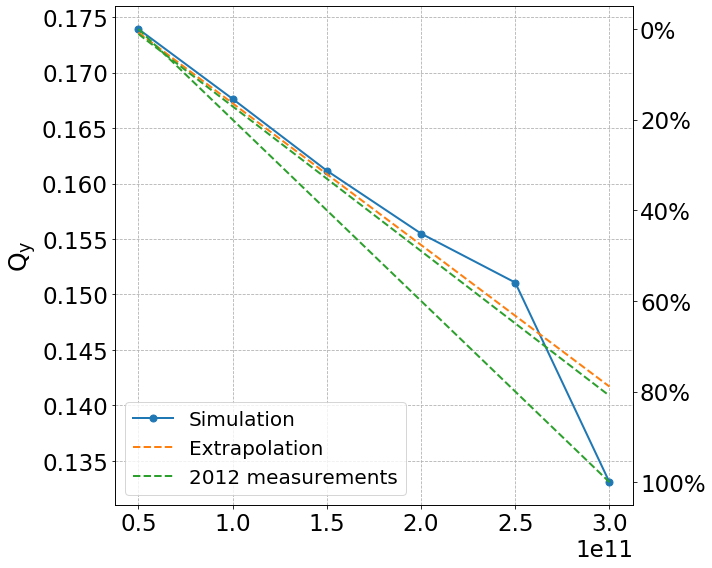

In [32]:
import matplotlib.ticker as mtick

perc = np.linspace(0, 100,len(intensity_list*slope))


fig, ax1 = plt.subplots(figsize=(10,8))

ax1.plot(intensity_list, Qy_list, '-o', c='C0', label='Simulation')
ax1.plot(intensity_list, Qy_frac+intensity_list*a, '--', c='C1', label='Extrapolation')
ax1.plot(intensity_list, Qy_frac+intensity_list*slope, '--', c='C2', label='2012 measurements') 


ax1.set_ylabel(r'$\mathrm{Q_y}$')#-Q_{y_0}}$')

ax2 = ax1.twinx() 
ax2.plot(intensity_list, perc, '--', c='C2', label='Theory: complete impedance model')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
ax2.invert_yaxis()


plt.xlabel('Intensity')
ax1.grid(linestyle='dashed')
ax1.legend(loc=3)

plt.tight_layout()

#ax1.set_ylim(0.16, 0.23)
#ax2.set_ylim(perc[-1], perc[0])



savefig = False
if savefig:
    plt.savefig(f'DQy_vs_intensity_Q20_2012_fullSPSQ20_steps_newBPMs_v2_vs_measurements_QpxQpy5.png', bbox_inches='tight')